In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 讀取Google股價資料(日)

data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [3]:
data.shape

(1262, 7)

In [4]:
# 統計量觀察

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723477e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.638005e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


### 建立model
- 只使用Close(價格)以及Date(時間)這兩個欄位

In [5]:
# 選取欄位
data = data[['Date', 'Close']]

# 改變欄位名稱, 好像是必須的, for model
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
data.head()

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


#### [安裝參考](https://dotblogs.com.tw/DivingDon/2020/03/03/python-fbprophet)
- 用conda
    - 所以是Python 3.6.5 64-bit(conda)可以用

In [6]:
# # Install pystan with pip before using pip to install fbprophet
# 痾...出錯了pip的fbprophet需要依賴套件, 沒有滿足blabla...
# !pip install pystan
# !pip install fbprophet

In [9]:
from fbprophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(data)  # 使用全部資料去訓練，先不管測試，等等直接用2021 data去看效果

C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\aband\.julia\conda\3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning

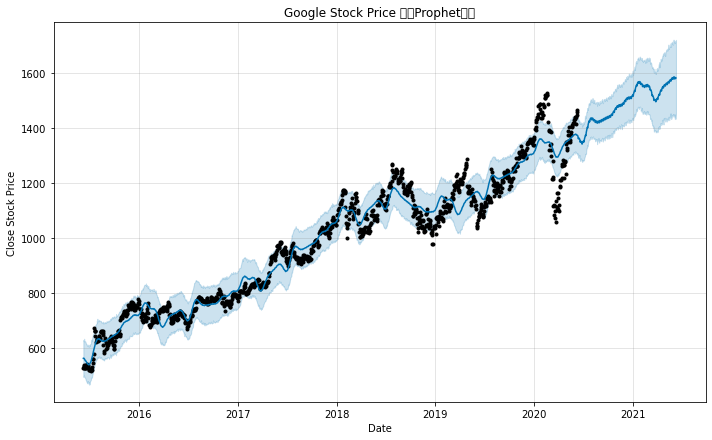

In [10]:
# 預測未來一年
future = model.make_future_dataframe(periods=365)
prediction = model.predict(future)
model.plot(prediction)

plt.title('Google Stock Price 利用Prophet預測')
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.show()

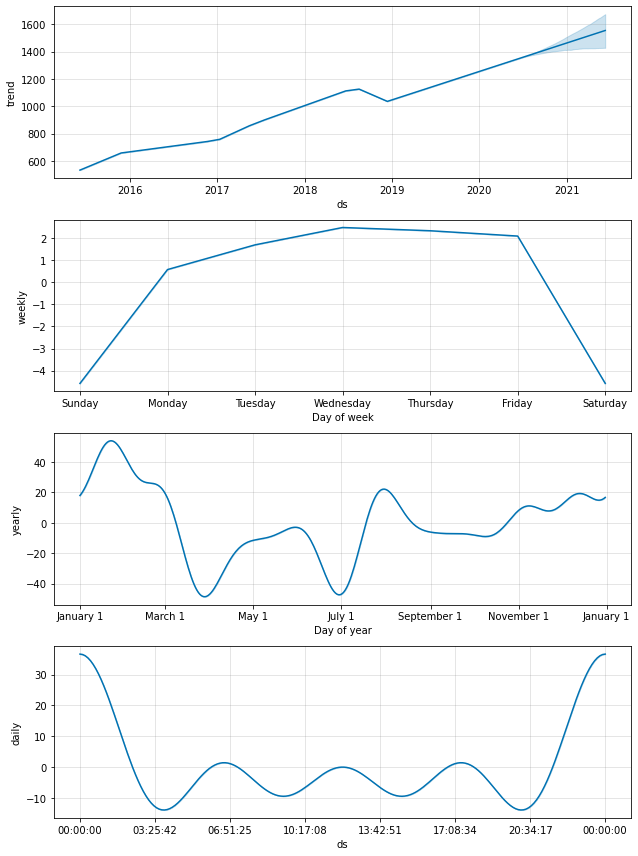

In [11]:
# 畫出trend, weekly, seasonally and daily components

model.plot_components(prediction)
plt.show()

> 有發現Covid19下降許多!